#### GA Runtime

In [42]:
import time
from genetic_algorithm1 import GeneticAlgorithm
from input_data import input_data
 
def run_comparative_analysis(ga, max_generations):
    # Initialize results containers
    ga_fitnesses = []

    # Timing GA
    start_time_ga = time.time()
    ga_best_solution, ga_fitness_history, convergence_generation, diversity_history = ga.run(max_generations)
    ga_time = time.time() - start_time_ga

    # Record fitness results
    ga_fitnesses.append(ga_fitness_history)

    print(f"GA best fitness: {ga_fitness_history[-1]}, Time: {ga_time:.2f}s")
    print(len(ga_fitness_history))

    return ga_fitnesses, ga_time, diversity_history

max_generations = 200
ga_instance = GeneticAlgorithm(input_data, pop_size=50, mutation_rate=0.6, crossover_rate=0.7)
ga_fitnesses, ga_time, ga_diversity_history = run_comparative_analysis(ga_instance, max_generations)


GA best fitness: 0, Time: 1.14s
47


#### DE Runtime

In [43]:
import time
from differential_evolution import DifferentialEvolution
from input_data import input_data
 
def run_comparative_analysis(de, max_generations):
    # Initialize results containers
    de_fitnesses = []
    
    # Timing DE
    start_time_de = time.time()
    de_best_solution, de_fitness_history, convergence_generation, diversity_history = de.run(max_generations)
    de_time = time.time() - start_time_de

    # Record fitness results
    de_fitnesses.append(de_fitness_history)

    print(f"DE best fitness: {de_fitness_history[-1]}, Time: {de_time:.2f}s")
    print(len(de_fitness_history), len(de_fitnesses))

    return de_fitnesses, de_time, diversity_history

# Assuming both GA and DE have `run()` method implemented
max_generations = 200
de_instance = DifferentialEvolution(input_data, pop_size=50, F=0.4, CR=0.9)
de_fitnesses, de_time, de_diversity_history = run_comparative_analysis(de_instance, max_generations)


DE best fitness: 0, Time: 5.40s
123 1


#### GA vs DE Fitness Progression

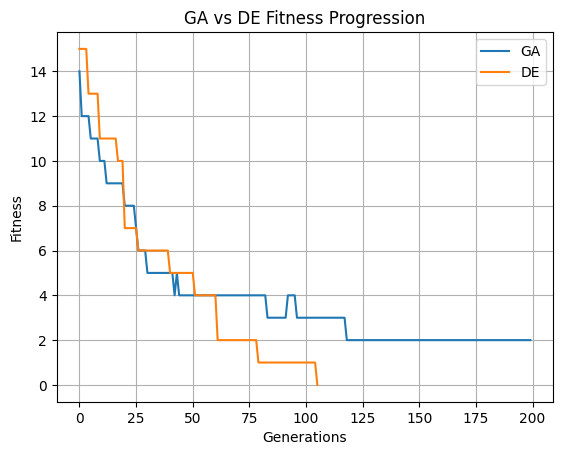

In [41]:
import matplotlib.pyplot as plt 

def plot_fitness_comparison(ga_fitnesses, de_fitnesses):
    
    plt.plot(ga_fitnesses, label="GA")
    plt.plot(de_fitnesses, label="DE")

    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title("GA vs DE Fitness Progression")

    plt.legend()
    plt.grid(True)
    plt.show()

plot_fitness_comparison(ga_fitnesses[-1], de_fitnesses[-1])

In [ ]:
import matplotlib.pyplot as plt 

def plot_diversity_progression(diversity_history, diversity_history):
    
    plt.plot(diversity_history, label="GA")
    plt.plot(diversity_history, label="DE")

    plt.xlabel("Generations")
    plt.ylabel("Diversity")
    plt.title("GA vs DE Diversity Progression")

    plt.legend()
    plt.grid(True)
    plt.show()

plot_fitness_comparison(diversity_history, diversity_history)

In [ ]:
import matplotlib.pyplot as plt

def plot_fitness_comparison(ga_fitnesses, de_fitnesses, ga_params, de_params):
    generations = range(len(ga_fitnesses))

    # Plot the fitness comparison
    plt.plot(generations, ga_fitnesses, label="GA Fitness")
    plt.plot(generations, de_fitnesses, label="DE Fitness")
    
    # Label axes
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title("GA vs DE Fitness Progress")
    
    # Create parameter strings
    ga_param_str = '\n'.join([f"GA {key}: {value}" for key, value in ga_params.items()])
    de_param_str = '\n'.join([f"DE {key}: {value}" for key, value in de_params.items()])
    
    # Combine GA and DE parameter strings
    param_text = f"{ga_param_str}\n\n{de_param_str}"
    
    # Add text box with parameters
    plt.text(0.95, 0.05, param_text, fontsize=10, verticalalignment='bottom', 
             horizontalalignment='right', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))

    # Show legend and plot
    plt.legend()
    plt.show()

# Example usage with parameters
ga_fitnesses = ga_fitnesses[-1]  # Assuming last fitness history from GA
de_fitnesses = de_fitnesses[-1]  # Assuming last fitness history from DE

ga_params = {'pop_size': 50, 'mutation_rate': 0.1, 'crossover_rate': 0.8, 'elitism': 2}
de_params = {'pop_size': 50, 'F': 0.5, 'CR': 0.8, 'mutation_strategy': 'rand/1/bin'}

plot_fitness_comparison(ga_fitnesses, de_fitnesses, ga_params, de_params)


#### Parameter Tuning for DE

In [4]:
import random
import numpy as np
import pandas as pd
from differential_evolution import DifferentialEvolution
from input_data import input_data


de_params = {
    # "pop_size": [50, 200],
    "F": [0.4, 1.0],
    "CR": [0.5, 1.0]
}

# Random search for DE
def random_search_de():
    random_de_settings = {
        # "pop_size": random.randint(de_params["pop_size"][0], de_params["pop_size"][1]),
        "F": random.uniform(de_params["F"][0], de_params["F"][1]),
        "CR": random.uniform(de_params["CR"][0], de_params["CR"][1])
    }
    return random_de_settings

results = []
num_iterations = 20
max_generations = 200
pop_size = 50


# Example: Perform random search for 20 iterations
for i in range(num_iterations):
    settings = random_search_de()

    # Run your GA and DE algorithms with these random parameters
    # Example: run_ga(ga_settings), run_de(de_settings)
    de = DifferentialEvolution(input_data, pop_size, settings["F"], settings["CR"])
    _, fitness_history, convergence_speed, diversity_history = de.run(max_generations)

    metrics = {
        'best_fitness': fitness_history[-1],
        'convergence_speed': convergence_speed,
        'std(diversity)': np.std(diversity_history)
    }
    results.append({
        'params': settings,
        'metrics': metrics
    })

df = pd.DataFrame(results)

df = pd.concat([df.drop(['params', 'metrics'], axis=1), df['params'].apply(pd.Series), df['metrics'].apply(pd.Series)], axis=1)

print(df)
    

           F        CR  best_fitness  convergence_speed  std(diversity)
0   0.698470  0.540549           2.0              199.0        2.177989
1   0.508097  0.567085           1.0              199.0        3.719495
2   0.508890  0.980109           0.0               66.0        9.517701
3   0.943995  0.544258           4.0              199.0        2.321851
4   0.746226  0.525652           2.0              199.0        2.989923
5   0.706566  0.668458           0.0              143.0        4.593294
6   0.772577  0.524830           2.0              199.0        3.704143
7   0.450426  0.595568           2.0              199.0        4.471519
8   0.566261  0.987251           1.0              199.0       12.920239
9   0.720111  0.729765           0.0              121.0        5.605244
10  0.924664  0.944651           2.0              199.0        6.404933
11  0.801351  0.602994           2.0              199.0        3.310742
12  0.714581  0.964538           1.0              199.0       14

#### Parameter Tuning for GA

In [1]:
import random
import numpy as np
import pandas as pd
from genetic_algorithm1 import GeneticAlgorithm
from input_data import input_data

ga_params = {
    "mutation_rate": [0.01, 0.5],
    "crossover_rate": [0.5, 1.0]
}

# Random search for GA
def random_search_ga():
    random_ga_settings = {
        "mutation_rate": random.uniform(ga_params["mutation_rate"][0], ga_params["mutation_rate"][1]),
        "crossover_rate": random.uniform(ga_params["crossover_rate"][0], ga_params["crossover_rate"][1])
    }
    return random_ga_settings


results = []
num_iterations = 20
max_generations = 200
pop_size = 50


# Example: Perform random search for 20 iterations
for i in range(num_iterations):
    settings = random_search_ga()

    # Run your GA and DE algorithms with these random parameters
    # Example: run_ga(ga_settings), run_de(de_settings)
    ga = GeneticAlgorithm(input_data, pop_size, settings["mutation_rate"], settings["crossover_rate"])
    _, fitness_history, convergence_speed, diversity_history = ga.run(max_generations)

    metrics = {
        'best_fitness': fitness_history[-1],
        'convergence_speed': convergence_speed,
        'std(diversity)': np.std(diversity_history)
    }
    results.append({
        'params': settings,
        'metrics': metrics
    })

df = pd.DataFrame(results)

df = pd.concat([df.drop(['params', 'metrics'], axis=1), df['params'].apply(pd.Series), df['metrics'].apply(pd.Series)], axis=1)

print(df)
    

    mutation_rate  crossover_rate  best_fitness  convergence_speed  \
0        0.050466        0.557208           6.0              199.0   
1        0.235644        0.784592           2.0              199.0   
2        0.262912        0.963510           4.0              199.0   
3        0.491686        0.982316           0.0              157.0   
4        0.023194        0.984949           7.0              199.0   
5        0.243903        0.652716           1.0              199.0   
6        0.167750        0.518288           2.0              199.0   
7        0.113651        0.906266           6.0              199.0   
8        0.207235        0.689904           3.0              199.0   
9        0.433439        0.579632           0.0               73.0   
10       0.262511        0.910342           0.0              162.0   
11       0.155436        0.963643           1.0              199.0   
12       0.487130        0.776916           0.0               60.0   
13       0.349893   

### GA Consistency

###### Average Best Fitness: The closer this is to the optimal fitness, the better the algorithm performs on average.
###### Standard Deviation of Best Fitness: A low value means the algorithm consistently finds good solutions, while a high value means that some runs are much better or worse than others.

In [ ]:
from genetic_algorithm1 import GeneticAlgorithm
from input_data import input_data
import numpy as np
import matplotlib.pyplot as plt

def measure_consistency(num_runs, max_generations):
    best_fitnesses = []
    
    for run in range(num_runs):
        seed = run*4 # Different seed for each run
        _, fitness_history, generation = ga.run(seed, max_generations)
        
        best_fitness = min(fitness_history)
        print(f"Run {run+1}, Last generation: {generation+1}, Best fitness: {best_fitness}")
        
        best_fitnesses.append(best_fitness)
    
    # Calculate the average and standard deviation
    avg_best_fitness = np.mean(best_fitnesses)
    std_best_fitness = np.std(best_fitnesses)

    # Example boxplot for best fitness values
    plt.boxplot(best_fitnesses)
    plt.title("Best Fitness Across Multiple Runs")
    plt.xlabel("Runs")
    plt.ylabel("Best Fitness")
    plt.show()

    # Example histogram for best fitness values
    plt.hist(best_fitnesses, bins=10, edgecolor='black')
    plt.title("Distribution of Best Fitness Across Runs")
    plt.xlabel("Best Fitness")
    plt.ylabel("Frequency")
    plt.show()
    
    return avg_best_fitness, std_best_fitness

ga = GeneticAlgorithm(input_data, pop_size=50, mutation_rate=0.5)

num_runs = 20
max_generations = 100

average, standard_deviation = measure_consistency(num_runs, max_generations)

print(f"Average Best Fitness: {average:.4f}")
print(f"Standard Deviation of Best Fitness: {standard_deviation:.4f}")



### DE Consistency

In [3]:
from differential_evolution import DifferentialEvolution
from input_data import input_data
import numpy as np
import matplotlib.pyplot as plt

def measure_consistency(num_runs, max_generations):
    best_fitnesses = []
    
    for run in range(num_runs):
        seed = run*4 # Different seed for each run
        _, fitness_history, generation = de.run(seed, max_generations)
        
        best_fitness = min(fitness_history)
        print(f"Run {run+1}, Last generation: {generation+1}, Best fitness: {best_fitness}")
        
        best_fitnesses.append(best_fitness)
    
    # Calculate the average and standard deviation
    avg_best_fitness = np.mean(best_fitnesses)
    std_best_fitness = np.std(best_fitnesses)


    # Example boxplot for best fitness values
    plt.boxplot(best_fitnesses)
    plt.title("Best Fitness Across Multiple Runs")
    plt.ylabel("Best Fitness")
    plt.show()

    # Example histogram for best fitness values
    plt.hist(best_fitnesses, bins=10, edgecolor='black')
    plt.title("Distribution of Best Fitness Across Runs")
    plt.xlabel("Best Fitness")
    plt.ylabel("Frequency")
    plt.show()
        
    return avg_best_fitness, std_best_fitness

de = DifferentialEvolution(input_data, pop_size=50, F=0.5, CR=0.6)

num_runs = 20
max_generations = 100

average, standard_deviation = measure_consistency(num_runs, max_generations)

print(f"Average Best Fitness: {average:.4f}")
print(f"Standard Deviation of Best Fitness: {standard_deviation:.4f}")


Run 1, Last generation: 100, Best fitness: 2
Run 2, Last generation: 96, Best fitness: 0
Run 3, Last generation: 1, Best fitness: 0
Run 4, Last generation: 1, Best fitness: 0
Run 5, Last generation: 1, Best fitness: 0
Run 6, Last generation: 1, Best fitness: 0
Run 7, Last generation: 1, Best fitness: 0
Run 8, Last generation: 1, Best fitness: 0
Run 9, Last generation: 1, Best fitness: 0
Run 10, Last generation: 1, Best fitness: 0
Run 11, Last generation: 1, Best fitness: 0
Run 12, Last generation: 1, Best fitness: 0
Run 13, Last generation: 1, Best fitness: 0
Run 14, Last generation: 1, Best fitness: 0
Run 15, Last generation: 1, Best fitness: 0
Run 16, Last generation: 1, Best fitness: 0
Run 17, Last generation: 1, Best fitness: 0
Run 18, Last generation: 1, Best fitness: 0
Run 19, Last generation: 1, Best fitness: 0
Run 20, Last generation: 1, Best fitness: 0
Average Best Fitness: 0.1000
Standard Deviation of Best Fitness: 0.4359


#### EXPERIMENTS

To compare both algorithms, the following performance metrics will be used: Solution quality/Fitness, Convergence speed, Std of diversity (to show how well the algorithm was able to maintain diversity), Consistency (in the quality of solutions generated over multiple runs), Time, Results. 
This would be run over 10 experiments, and a table of parameters and metrics will be returned. As well as graphs for each metric.

#### Genetic Algorithm Experiment

In [3]:
import random
import numpy as np
import pandas as pd
from genetic_algorithm1 import GeneticAlgorithm
from input_data import input_data
import time

ga_params = {
    "mutation_rate": 0.6,
    "crossover_rate": 0.7
}

results = []
num_runs = 30
max_generations = 200
pop_size = 50


for i in range(num_runs):

    ga = GeneticAlgorithm(input_data, pop_size, ga_params["mutation_rate"], ga_params["crossover_rate"])
    start_time_ga = time.time()
    _, fitness_history, convergence_speed, diversity_history = ga.run(max_generations)
    ga_time = time.time() - start_time_ga

    metrics = {
        'solution_fitness': fitness_history[-1],
        'convergence_speed': convergence_speed,
        'std(diversity)': np.std(diversity_history),
        'Runtime': f"{ga_time:.2f}"
    }
    results.append({
        'params': ga_params,
        'metrics': metrics
    })

df = pd.DataFrame(results)

df = pd.concat([df.drop(['params', 'metrics'], axis=1), df['params'].apply(pd.Series), df['metrics'].apply(pd.Series)], axis=1)
df.index = df.index + 1
df.index.name = 'S/N'

print(df)
    

     mutation_rate  crossover_rate  solution_fitness  convergence_speed  \
S/N                                                                       
1              0.6             0.7                 1                199   
2              0.6             0.7                 1                199   
3              0.6             0.7                 0                191   
4              0.6             0.7                 0                149   
5              0.6             0.7                 0                125   
6              0.6             0.7                 0                 53   
7              0.6             0.7                 0                167   
8              0.6             0.7                 0                176   
9              0.6             0.7                 2                199   
10             0.6             0.7                 0                125   

     std(diversity) Runtime  
S/N                          
1          8.613772    8.54  
2        

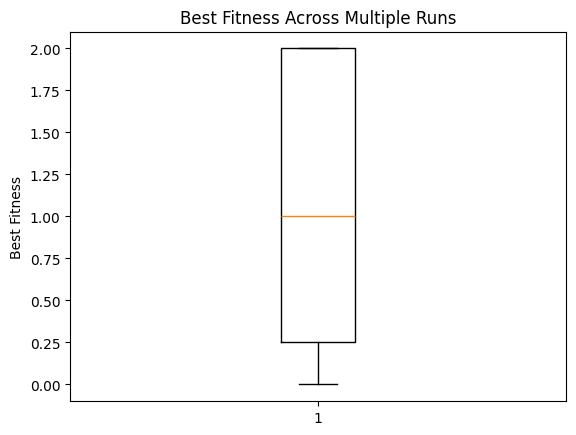

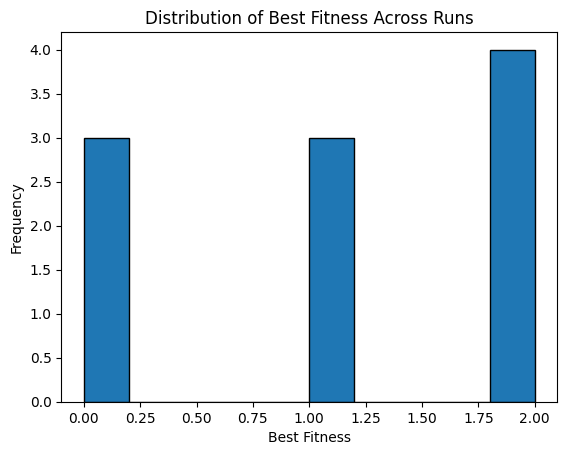

Average Best Fitness: 1.1000
Standard Deviation of Best Fitness: 0.8307


In [9]:
import numpy as np
import matplotlib.pyplot as plt

best_fitness = [result['metrics']['solution_fitness'] for result in results]

# Calculate the average and standard deviation
avg_best_fitness = np.mean(best_fitness)
std_best_fitness = np.std(best_fitness)


# Example boxplot for best fitness values
plt.boxplot(best_fitness)
plt.title("Best Fitness Across Multiple Runs")
plt.ylabel("Best Fitness")
plt.show()

# Example histogram for best fitness values
plt.hist(best_fitness, bins=10, edgecolor='black')
plt.title("Distribution of Best Fitness Across Runs")
plt.xlabel("Best Fitness")
plt.ylabel("Frequency")
plt.show()

print(f"Average Best Fitness: {avg_best_fitness:.4f}")
print(f"Standard Deviation of Best Fitness: {std_best_fitness:.4f}")

#### Differential Evolution Experiment

In [21]:
import random
import numpy as np
import pandas as pd
from differential_evolution import DifferentialEvolution
from input_data import input_data
import time


de_params = {
    "F": 0.4,
    "CR": 0.9
}

results = []
num_iterations = 10
max_generations = 200
pop_size = 50


for i in range(num_iterations):

    de = DifferentialEvolution(input_data, pop_size, de_params["F"], de_params["CR"])
    start_time_de = time.time()
    _, fitness_history, convergence_speed, diversity_history = de.run(max_generations)
    de_time = time.time() - start_time_de

    metrics = {
        'best_fitness': fitness_history[-1],
        'convergence_speed': convergence_speed,
        'std(diversity)': np.std(diversity_history),
        'Runtime': f"{de_time:.2f}"
    }
    results.append({
        'params': de_params,
        'metrics': metrics
    })

df = pd.DataFrame(results)

df = pd.concat([df.drop(['params', 'metrics'], axis=1), df['params'].apply(pd.Series), df['metrics'].apply(pd.Series)], axis=1)
df.index = df.index + 1
df.index.name = 'S/N'

print(df)

       F   CR  best_fitness  convergence_speed  std(diversity) Runtime
S/N                                                                   
1    0.4  0.8             0                131        7.834802    5.74
2    0.4  0.8             0                131        7.884447    7.46
3    0.4  0.8             0                101        6.060615    6.94
4    0.4  0.8             0                122        6.873898   15.90
5    0.4  0.8             0                123        6.517555    8.78
6    0.4  0.8             1                199        6.497290   13.45
7    0.4  0.8             0                100        6.684583    5.38
8    0.4  0.8             0                122        6.925576    6.43
9    0.4  0.8             0                180        6.231540    9.48
10   0.4  0.8             0                185        6.697093    9.71


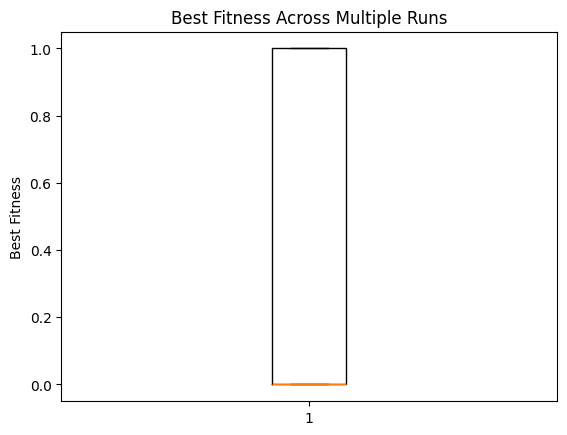

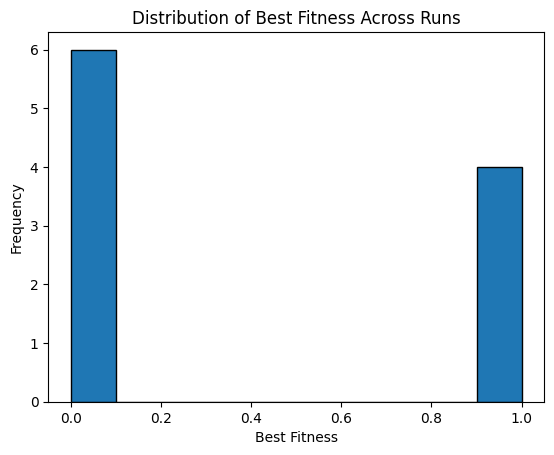

Average Best Fitness: 0.4000
Standard Deviation of Best Fitness: 0.4899


In [16]:
import numpy as np
import matplotlib.pyplot as plt

best_fitness = [result['metrics']['best_fitness'] for result in results]

# Calculate the average and standard deviation
avg_best_fitness = np.mean(best_fitness)
std_best_fitness = np.std(best_fitness)


# Example boxplot for best fitness values
plt.boxplot(best_fitness)
plt.title("Best Fitness Across Multiple Runs")
plt.ylabel("Best Fitness")
plt.show()

# Example histogram for best fitness values
plt.hist(best_fitness, bins=10, edgecolor='black')
plt.title("Distribution of Best Fitness Across Runs")
plt.xlabel("Best Fitness")
plt.ylabel("Frequency")
plt.show()

print(f"Average Best Fitness: {avg_best_fitness:.4f}")
print(f"Standard Deviation of Best Fitness: {std_best_fitness:.4f}")